
# Boston House Price Prediction using Linear Regression

In [142]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [143]:
#checking the dataset
bos

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [144]:
#Giving column names to datasets
bos.columns=boston.feature_names
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [145]:
#Adding Target values PRICE to dataframe
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [146]:
#checkng data shape and null values
bos.shape

(506, 14)

In [147]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [148]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Data has no null values.
Data has all continous values and no categorical values.

## Data preprocessing

<AxesSubplot:>

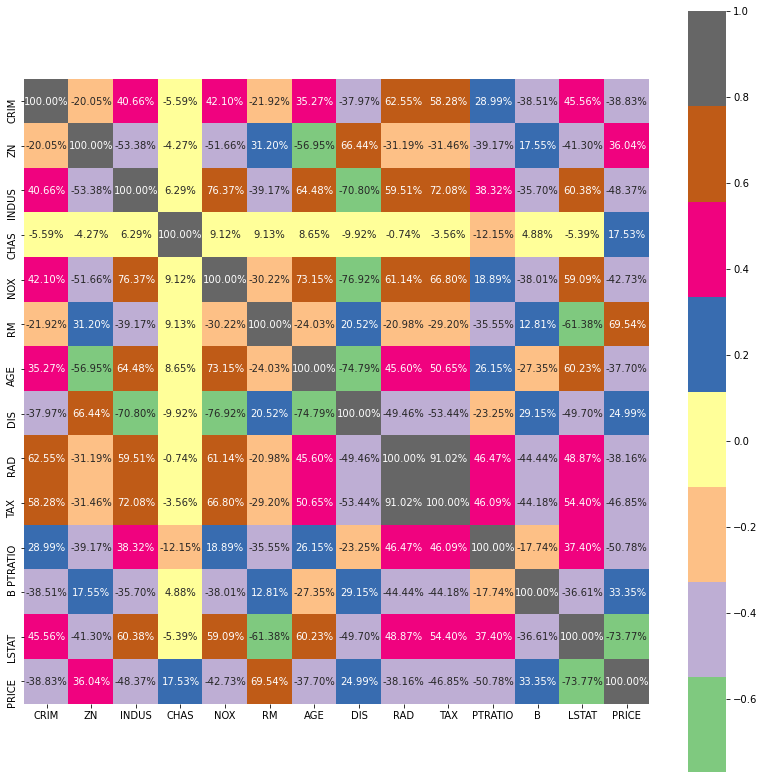

In [149]:
#Checking the correlation matrix for dataset
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(bos.corr(), square= True, fmt='.2%', annot=True, cmap='Accent')

Inputs from Heatmap of Correlation.
1. RAD and TAX are highly correlated (91.02%), so we can remove one from them in our dataset.

# Checking for skewness

In [150]:
from scipy.stats import skew

for feature in  boston.feature_names:
    print(feature ," ", skew(bos[feature]))

CRIM   5.207652387859715
ZN   2.219063057148425
INDUS   0.29414627684418543
CHAS   3.395799292642519
NOX   0.7271441597740319
RM   0.40241466802496245
AGE   -0.5971855948016143
DIS   1.0087787565152246
RAD   1.0018334924536951
TAX   0.6679682687237768
PTRATIO   -0.7999445320367449
B   -2.8817983452627716
LSTAT   0.9037707431346133


In [151]:
bos["CRIM"] = np.log(bos.CRIM)
bos["B"] = np.log(bos.B)
bos["ZN"] = np.log(bos.ZN+1)

In [152]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-5.064036,2.944439,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,5.983684,4.98,24.0
1,-3.600502,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,5.983684,9.14,21.6
2,-3.601235,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,5.973377,4.03,34.7
3,-3.430523,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,5.977949,2.94,33.4
4,-2.672924,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.983684,5.33,36.2


## Scaling of Data

In [153]:
x = bos.drop(['PRICE'] , axis = 1)
y = bos['PRICE']

In [154]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-5.064036,2.944439,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,5.983684,4.98
1,-3.600502,0.000000,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,5.983684,9.14
2,-3.601235,0.000000,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,5.973377,4.03
3,-3.430523,0.000000,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,5.977949,2.94
4,-2.672924,0.000000,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.983684,5.33


In [155]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled=scalar.fit_transform(x)

In [156]:
x_scaled

array([[-1.98322812,  1.22932964, -1.2879095 , ..., -1.45900038,
         0.3025923 , -1.0755623 ],
       [-1.30563886, -0.58909073, -0.59338101, ..., -0.30309415,
         0.3025923 , -0.49243937],
       [-1.30597804, -0.58909073, -0.59338101, ..., -0.30309415,
         0.28925293, -1.2087274 ],
       ...,
       [-0.93540227, -0.58909073,  0.11573841, ...,  1.17646583,
         0.3025923 , -0.98304761],
       [-0.662329  , -0.58909073,  0.11573841, ...,  1.17646583,
         0.29129387, -0.86530163],
       [-1.05026732, -0.58909073,  0.11573841, ...,  1.17646583,
         0.3025923 , -0.66905833]])

In [157]:
bos_scaled = pd.DataFrame(x_scaled , columns= boston.feature_names )
bos_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.983228,1.229330,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.302592,-1.075562
1,-1.305639,-0.589091,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.302592,-0.492439
2,-1.305978,-0.589091,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.289253,-1.208727
3,-1.226942,-0.589091,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.295169,-1.361517
4,-0.876187,-0.589091,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.302592,-1.026501


# Checking correlation again with scaled data

<AxesSubplot:>

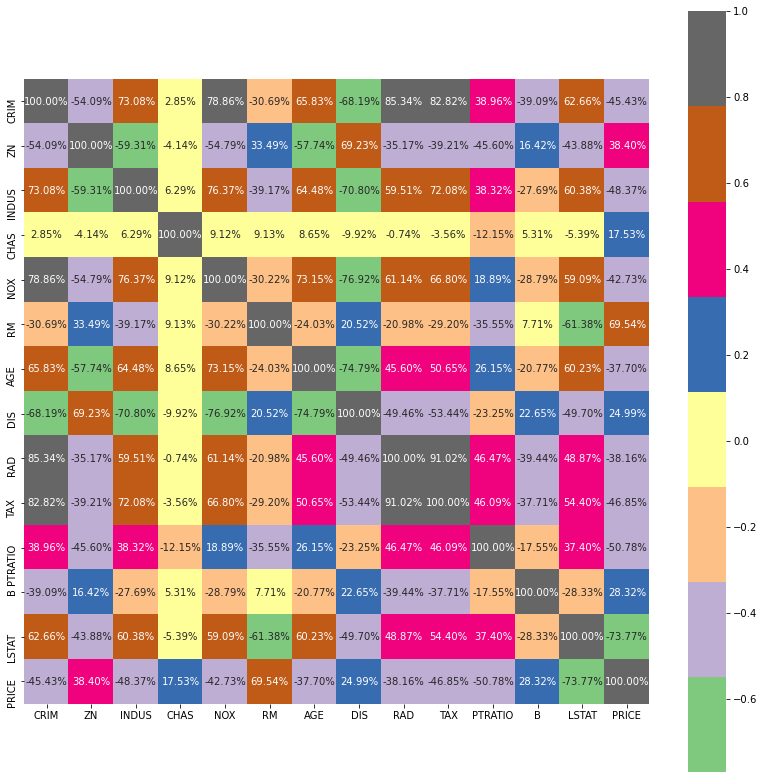

In [158]:
bos_scaled["PRICE"]=boston.target
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(bos_scaled.corr(), square= True, fmt='.2%', annot=True, cmap='Accent')

In [159]:
bos_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,-1.983228,1.229330,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.302592,-1.075562,24.0
1,-1.305639,-0.589091,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.302592,-0.492439,21.6
2,-1.305978,-0.589091,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.289253,-1.208727,34.7
3,-1.226942,-0.589091,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.295169,-1.361517,33.4
4,-0.876187,-0.589091,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.302592,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.921368,-0.589091,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.286483,-0.418147,22.4
502,-1.071652,-0.589091,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.302592,-0.500850,20.6
503,-0.935402,-0.589091,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.302592,-0.983048,23.9
504,-0.662329,-0.589091,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.291294,-0.865302,22.0


In [182]:
X = bos_scaled.iloc[:,0:13] #independent columns
y =bos_scaled.iloc[:,-1] #target column i.e price range

# Using OLS method for more feature extraction.
import statsmodels.api as smf
model=smf.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              4.429
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                    3.96e-07
Time:                        09:55:01   Log-Likelihood:                         -2305.1
No. Observations:                 506   AIC:                                      4636.
Df Residuals:                     493   BIC:                                      4691.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM           0.5402      2.890      0.187      0.852      -5.137       6.218
ZN             0.7419      1.691      0.439      0.661      -2.581       4.065
INDUS          0.0887      2.080      0.043      0.966      -3.998       4.176
CHAS           0.7329      1.073      0.683      0.495      -1.376       2.842
NOX           -2.1537      2.244     -0.960      0.338      -6.563       2.255
RM             2.7653      1.439      1.921      0.055      -0.062       5.593
AGE           -0.1037      1.833     -0.057      0.955      -3.704       3.497
DIS           -2.7981      2.086     -1.341      0.180      -6.897       1.301
RAD            1.6676      3.257      0.512      0.609      -4.732       8.068
TAX           -1.7400      3.052     -0.570      0.569      -7.736       4.256
PTRATIO       -2.0229      1.444     -1.401      0.162      -4.860       0.814
B              0.9689      1.149      0.843      0.400      -1.289       3.227
LSTAT         -4.0001      1.768     -2.262      0.024      -7.474      -0.526
==============================================================================
Omnibus:                      167.633   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.296
Skew:                           1.426   Prob(JB):                    7.12e-159
Kurtosis:                       8.140   Cond. No.                         11.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
list_feature=list(boston.feature_names)
list_feature

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [214]:
#RAD feature is dropped as it has high correlation with TAX
#INDUS can  be removed as has very low significance
X=bos_scaled[['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'PTRATIO',
 'B',
 'LSTAT']]
Y=bos_scaled['PRICE']

In [215]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
y_predict_train = model.predict(x_train)
y_predict_test = model.predict(x_test)

In [217]:
print("Training Accuracy", model.score(x_train,y_train)*100)
print('MSE Train', mean_squared_error(y_train,y_predict_train))

Training Accuracy 72.47466693297262
MSE Train 23.118694267613183


In [218]:
print("Test Accuracy", model.score(x_test,y_test)*100)
print('MSE Test', mean_squared_error(y_test,y_predict_test))

Test Accuracy 72.79020524799384
MSE Test 23.26072038712641


# Regularisation

In [219]:
from sklearn.linear_model import Lasso , LassoCV , Ridge , RidgeCV , ElasticNet , ElasticNetCV

In [220]:
lassocv = LassoCV(alphas=None , cv=30 , max_iter=20000000 , normalize=True )
lassocv

LassoCV(cv=30, max_iter=20000000, normalize=True)

In [221]:
lassocv.fit(x_train , y_train)
lassocv.alpha_     ##alpha value
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train , y_train)
lassoscore = lasso.score(x_test , y_test)
lassoscore

0.7277118880592989

In [222]:
alpha = np.random.uniform(0 , 10 ,100)
ridgecv = RidgeCV( alphas=alpha , cv = 10 , normalize=True) 
print(ridgecv)
ridgecv.fit(x_train , y_train)
print(ridgecv.alpha_)
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train , y_train)
ridge_score = ridge.score(x_test , y_test)
ridge_score

RidgeCV(alphas=array([5.87778192, 8.67440986, 2.80699526, 5.27884232, 5.72967248,
       9.69749316, 1.33260641, 4.31570728, 5.4261903 , 1.31346815,
       8.80762651, 5.62152933, 9.72590788, 5.50613578, 6.9769342 ,
       7.01185056, 7.11327187, 7.97831262, 3.14064298, 7.13687904,
       2.44049037, 3.4354849 , 2.04695503, 9.04853521, 9.1872711 ,
       5.25349489, 5.4520321 , 8.43363917, 3.37982573, 7.63286207,
       7.5...
       1.08054349, 1.16827339, 2.14331816, 3.58977393, 4.08799274,
       8.75439878, 3.9896306 , 2.01809031, 0.08035455, 3.79937569,
       1.12570379, 8.15955025, 3.81273616, 0.87234255, 0.4215882 ,
       5.21404414, 5.16031328, 2.44577191, 5.95044843, 0.99521484,
       6.29879978, 4.29253646, 4.44055992, 5.88179382, 4.33397239,
       4.96807317, 7.3532884 , 4.8302242 , 2.05137387, 6.5253933 ,
       6.63351926, 9.70926828, 4.05924855, 9.19929996, 9.28623631]),
        cv=10, normalize=True)
0.08035454740073833


0.7278781447300211

In [223]:
elastic = ElasticNetCV(alphas=None , cv = 10 , normalize=True)
elastic
elastic.fit(x_train , y_train)
print(elastic.alpha_ , elastic.l1_ratio)
elas = ElasticNet(alpha=elastic.alpha_ , l1_ratio=elastic.l1_ratio)
elas
elas.fit(x_train , y_train)
elastic_score = elas.score(x_test , y_test)
elastic_score

0.0006701289331196591 0.5


0.727835325157574

# Dumping the model

In [225]:
import pickle
with open('model/model.pkl','wb') as file:
    pickle.dump(model, file)

In [226]:
# saving the columns
model_columns = list(X.columns)
with open('model/model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)